In [1]:
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np
from scipy.io.wavfile import write
from PIL import Image
from tqdm.notebook import trange, tqdm
from datetime import datetime
from joblib import Parallel, delayed

## Формула

In [ ]:
from utils.figures import circle_mp

n_jobs = 4
di = 4800  * 1
dg = 1

pixels =circle_mp(di, n_jobs)


In [2]:
half = int(len(pixels) / 2)
draw = pixels[:half] \
        + list(np.array(pixels[:half])**.95 +  np.array(pixels[:half]).max()) \
       + list(np.array(pixels)*-1) \

draw2 = list(np.array(pixels) ** .9)

draw = draw + draw2
# # draw = draw + list(np.array(draw)*-1)
# # draw = [i if i < 720 * .5 else i / np.abs(i)**.2 for i  in draw ]
# # draw = [i if i > -720 else i / 2 for i  in draw ]
plt.plot(draw)

# half

NameError: name 'pixels' is not defined

ERROR! Session/line number was not unique in database. History logging moved to new session 979


In [5]:
samples_count = 882000

samples_curve = draw * int(samples_count / len(pixels) )
samples_curve_ = draw * int(samples_count / len(pixels) )
# samples_curve_ = list(range(8000)) * int(samples_count / len(pixels_per_line) )

print(len(samples_curve), samples_curve[:3], samples_curve_[:3])

# samples_curve[:3]

samples_curve = np.array(samples_curve).astype(np.float32)
samples_curve_ = np.array(samples_curve_).astype(np.float32)

# plt.figure(figsize=(15, 8))
# plt.subplot(3, 1, 1)
# plt.plot(samples_curve_[:50000])

# plt.figure(figsize=(15, 8))
# plt.subplot(3, 1, 1)
# plt.plot(samples_curve_[:5000])


2620800 [1, 3, 5] [1, 3, 5]


## Звук

samples_count 441000.0


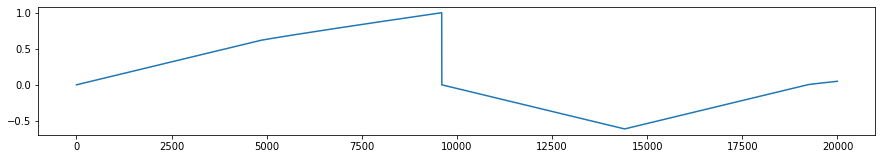

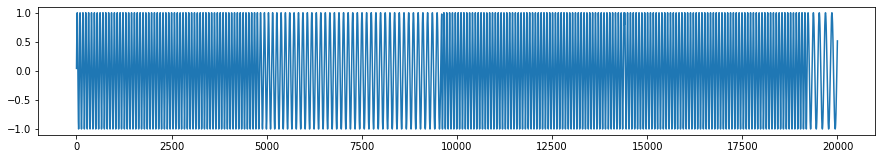

In [6]:
fs = 44100 / 2   # sampling rate, Hz, must be integer
duration = 20.0   # in seconds, may be float
f = 440 / 3 # sine frequency, Hz, may be float

# waveform = (np.sin(2*np.pi*np.arange(fs*duration)*f/fs))

def get_core(samples_curve, f,fs,duration):
#     return [i % 50* i for i in 2*np.pi*np.arange(fs*duration)*f/fs]
    samples_count = fs*duration
    print('samples_count',samples_count)
#     samples_curve = np.array([i  for i in range(int(samples_count))])
#     print(samples_curve[:5])
    return [i  for i in 2*np.pi*samples_curve*f/fs]

core = get_core(samples_curve, f,fs,duration)
# core2 = get_core(samples_curve_,f,fs,duration)

core_norm = np.array(core) / np.array(core).max()

waveform = np.sin(core)
# waveform2 = np.sin(core2)
waveform_total = waveform# + waveform2
waveform_total = waveform_total.astype(np.float32)


limit =20000

plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 1)
plt.plot(core_norm[:limit])

# plt.figure(figsize=(15, 8))
# plt.subplot(3, 1, 1)
# plt.plot(core2[:limit])


# plt.figure(figsize=(15, 8))
# plt.subplot(3, 1, 1)
# plt.plot(waveform[:limit])

# plt.figure(figsize=(15, 8))
# plt.subplot(3, 1, 1)
# plt.plot(waveform2[:limit])

plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 1)
plt.plot(waveform_total[:limit])

Audio(waveform_total, rate=fs)

In [168]:
# len(samples_curve)

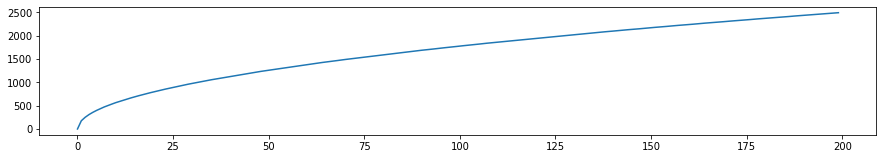

In [76]:
# def get_core(f,fs,duration):
# #     return [i % 10* i for i in 2*np.pi*np.arange(fs*duration)*f/fs]
#     print([np.arange(fs*duration)[0], np.arange(fs*duration)[-1]])
#     return [i for i in 2*np.pi*np.arange(fs*duration)*f/fs]

# def get_core_core(f,fs,duration):
#     return [i % i** i for i in 2*np.pi*np.arange(fs*duration)*f/fs]
# core = get_core(f,fs,duration)



plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 1)
plt.plot(samples_curve[:200])

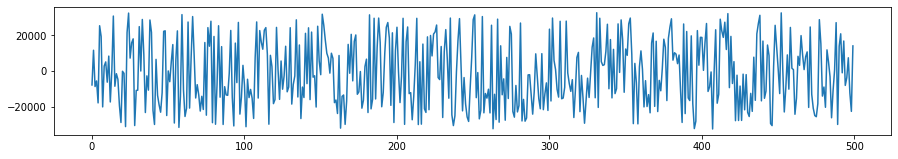

In [6]:
data = np.random.uniform(-1,1,44100) # 44100 random samples between -1 and 1
scaled = np.int16(data/np.max(np.abs(data)) * 32767)

plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 1)
plt.plot(scaled[:500])

In [20]:
Audio(waveform, rate=44100)

In [1]:
# for paFloat32 sample values must be in range [-1.0, 1.0]
stream = p.open(format=pyaudio.paFloat32,
                channels=1,
                rate=fs,
                output=True)

# play. May repeat with different volume values (if done interactively) 
stream.write(volume*samples)

stream.stop_stream()
stream.close()

p.terminate()

ModuleNotFoundError: No module named 'pyaudio'